### Computational Prob Set 6 -- Newton's Method

#### Name: Zunda Xu ( zunda@uchicago.edu )

#### Problem 1

In [1]:
# Import packages and libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
import scipy.linalg as la

def Newton(f, x0, f_prime, tol = 1e-5, max_iter = 15):
    for i in range(max_iter): 
        converge = False 
        x1 = x0 - f(x0)/f_prime(x0)
        if abs(x1 - x0) < tol:
            converge = True
            break
        x0 = x1
    return x0, converge 

In [2]:
f = lambda x: np.exp(x) - 2
f_prime = lambda x: np.exp(x)

print(Newton(f, 0.5, f_prime))
print(newton(f, 0.5))

(0.69314719995859264, True)
0.69314718056


#### Problem 2

In [4]:
from autograd import grad, jacobian
import autograd.numpy as anp

def prob2(N1, N2, P1, P2):
    f = lambda x: P1 * ((1 + x) ** N1 - 1) - P2 * (1 - (1 + x) ** (-N2))
    f1 = grad(f)
    r = Newton(f, 0.1, f1)[0]
    return r
print(prob2(30, 20, 2000, 8000))

0.03878102386


#### Problem 3

In [5]:
def Backtracking(f, x0, f_prime, alpha = 1, tol = 1e-5, max_iter = 15):
    
    for i in range(max_iter): 
        converge = False 
        x1 = x0 - alpha*f(x0)/f_prime(x0)
        if abs(x1 - x0) < tol:
            converge = True
            break
        x0 = x1
    return x0, converge 
f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
f1 = grad(f)

In [6]:
Backtracking(f, 0.01, f1, 0.4)

(-3.199999999999966e-06, True)

In [7]:
Backtracking(f, 0.01, f1)

(-327.68000000000075, False)

#### Problem 4

In [10]:
def problem_4(f, x0, f_prime, alpha, tol = 1e-5, max_iter = 15):
    i = 0
    x1 = 10
    while i < max_iter and abs(x1-x0) > tol:
        x1 = x0
        x0 = x0 - alpha * f(x0)/f_prime(x0)
        i += 1
    return x0, i

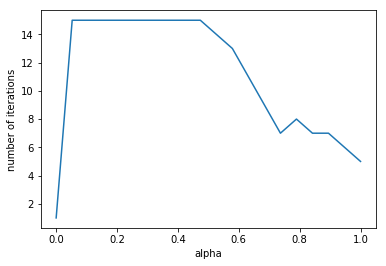

In [11]:
alpha = np.linspace(0, 1, 20)
get_iter = np.zeros(20)
f = lambda x : np.exp(x) - 2
f_prime = lambda x : np.exp(x)
for i in range(20):
    get_iter[i] = problem_4(f, 0.1, f_prime, alpha[i])[1]
plt.plot(alpha,get_iter )
plt.ylabel('number of iterations')
plt.xlabel('alpha')
plt.show()

#### Problem 5

In [73]:
def high_dim_newton(f, x0, alpha = 1, tol = 1e-5, max_iter = 15):
    i = 0
    x1 = 10
    f_prime = jacobian(f)
    while i < max_iter and la.norm(x1-x0) > tol:
        x1 = x0
        x0 = x0 - alpha * np.dot(la.inv(f_prime(x0)), f(x0))
        i += 1
    return x0

In [74]:
f = lambda x: anp.exp(x) - 2
print(high_dim_newton(f, np.array([0.1])))

[0.69314718]


# Problem 6

In [80]:
gamma, delta = 5, 1
f = lambda x: anp.array([gamma * x[0] * x[1] -x[0] * (1 + x[1]), -x[0] * x[1] + (delta - x[1]) * (1 + x[1])])
high_dim_newton(f, anp.array([-0.15, 0.10]))


array([-5.93196686e-15, -1.00000000e+00])

In [81]:
high_dim_newton(f, anp.array([-0.15, 0.10]),0.55)

array([ 0.00498312, -1.0019193 ])

# Problem 7

In [62]:
def basins(f, f_prime, zeros, bounds, res, iters = 200):
    x_real = np.linspace(bounds[0], bounds[1], res)
    x_imag = np.linspace(bounds[2], bounds[3], res)
    X = np.zeros((res,res))
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X = X_real + 1j*X_imag
    Y = np.zeros((res, res))
    for i in range(res):
        for j in range(res):
            x0 = X[i, j]
            for k in range(iters): 
                x1 = x0 - f(x0)/f_prime(x0)
                if abs(x1 - x0) < 1e-5: 
                    break
                x0 = x1
            Y[i, j] = np.argmin(np.abs(zeros - x0))
    return x_real, x_imag, Y
   

In [64]:
bounds = [-1.5, 1.5, -1.5, 1.5]
roots1 = np.array([1, -1/2 + (np.sqrt(3)/2)*1j, -1/2 - (np.sqrt(3)/2)*1j])
roots2 = np.array([0, 1, -1])
f = lambda x: x**3 - 1
Df = lambda x: 3*x**2
g = lambda x: x**3 - x
Dg = lambda x: 3*x**2 - 1


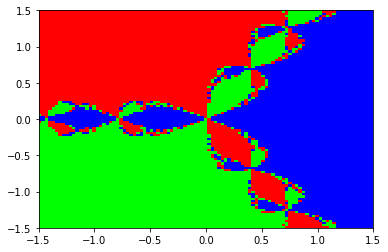

In [65]:
real, imag, y = basins(f, Df, roots1, bounds, 100)
plt.pcolormesh(real, imag, y, cmap = 'brg')
plt.show()

#basins(g, Dg, roots2, bounds, 100)

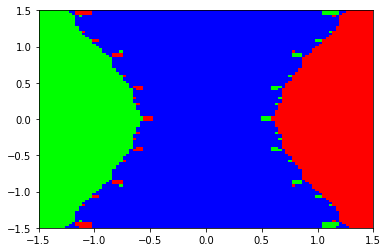

In [66]:
real, imag, y = basins(g, Dg, roots2, bounds, 100)
plt.pcolormesh(real, imag, y, cmap = 'brg')
plt.show()